In [6]:
dim_x = 2428
dim_y = 2428

mu = [700, 800]
location = [700, 800]
local_range_edge_len = 450
map_div_num = 15
grid_edge_len = local_range_edge_len/map_div_num
print(grid_edge_len)


x_coord_grid = int((location[0] - mu[0] + local_range_edge_len / 2) / grid_edge_len)
y_coord_grid = int((location[1] - mu[1] + local_range_edge_len / 2) / grid_edge_len)

print(x_coord_grid, y_coord_grid)


30.0
7 7


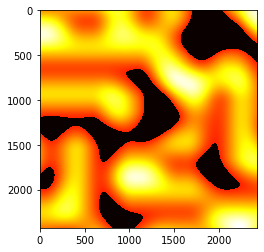

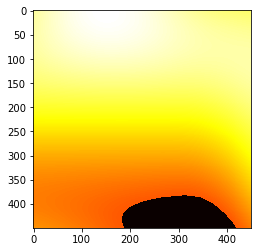

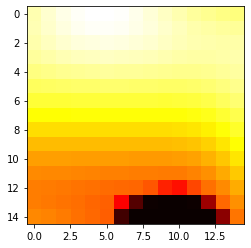

In [80]:
import numpy as np
import matplotlib.pyplot as plt
grid = np.load("/home/sye40/PrisonerEscape/simulator/forest_coverage/map_set/2_darker.npy")

# Plot the grid
plt.imshow(grid, cmap='hot', interpolation='nearest')
plt.show()

grid = (grid - 0.2)/0.6

loc = (500, 500)

def get_region(x, y, grid):
    local_range_edge_len = 450
    half_length = local_range_edge_len // 2
    region = np.full((local_range_edge_len, local_range_edge_len), -1.)  # Initialize the region with -1 values
    x_min = max(x - half_length, 0)  # Compute the minimum x index for the region
    x_max = min(x + half_length, grid.shape[0] - 1)  # Compute the maximum x index for the region
    y_min = max(y - half_length, 0)  # Compute the minimum y index for the region
    y_max = min(y + half_length, grid.shape[1] - 1)  # Compute the maximum y index for the region

    grid_region = grid[x_min:x_max, y_min:y_max]

    # Copy the valid region of the grid into the output region array
    region[(half_length - (x - x_min)):(half_length + (x_max - x)), (half_length - (y - y_min)):(half_length + (y_max - y))] = grid_region
    return region

new_grid = get_region(500, 1000, grid)

plt.imshow(new_grid, cmap='hot', interpolation='nearest')
plt.show()

def downsize_grid(grid, cell_size = 30):
    new_shape = 15
    g = grid.reshape((new_shape, cell_size, new_shape, cell_size))
    g = np.mean(g, axis=(1, 3)) # np.mean produces some artifacts at the edges where there is -1
    return g

new_grid = downsize_grid(new_grid)

plt.imshow(new_grid, cmap='hot', interpolation='nearest')
plt.show()

In [56]:
import numpy as np

# Assume the grid is stored in a variable called 'grid'
grid = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])

# Reshape the grid into 2x2 blocks
blocks = grid.reshape(2, 2, 2, 2)

print(blocks)

# Take the mean of each 2x2 block along the last two axes
new_grid = blocks.mean(axis=(1, 3))

# Display the original and new grids
print("Original grid:\n", grid)
print("New grid:\n", new_grid)

[[[[ 1  2]
   [ 3  4]]

  [[ 5  6]
   [ 7  8]]]


 [[[ 9 10]
   [11 12]]

  [[13 14]
   [15 16]]]]
Original grid:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
New grid:
 [[ 3.5  5.5]
 [11.5 13.5]]
